# Spam Detection Project 2

Steps:

Read dataset and make it in proper format.
Encode labels
Convert all cases to lower
Remove punctuations
Remove Stopwords
Check stats of messages
Convert all texts into vectors
Import classifier
Train and test
Check the accuracy/confusion matrix.

1. Data Preparation
2. Building word dictionary
3. Feature extraction
4. Training classifiers
5. Testing 
6. Performance evaluation using multiple metrics

Spam detection
Read dataset and make it in proper format.
Encode labels
Convert all cases to lower
Remove punctuations
Remove Stopwords
Check stats of messages
Convert all texts into vectors
Import classifier
Train and test
Check the accuracy/confusion matrix.

In [241]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings

In [242]:
warnings.filterwarnings('ignore')

In [243]:
emails = pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [244]:
emails.shape

(2893, 3)

In [245]:
print ('Regular(0) and Spam(1) counts','\n',emails.label.value_counts())

Regular(0) and Spam(1) counts 
 0    2412
1     481
Name: label, dtype: int64


In [246]:
#Ratio
print ('spam ratio = ', round(len(emails[emails['label']==1]) / len(sms.label),2)*100,'%')
print ('ham ratio  = ', round(len(emails[emails['label']==0]) / len(sms.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [247]:
#New column for Length of message
emails['subject_length'] = emails.subject.str.len()
emails['message_length'] = emails.message.str.len()
emails.head(5)

,subject,message,label,subject_length,message_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046


# 1. Data Preparation

In [248]:
# Convert all messages to lower case
emails['subject'] = emails['subject'].str.lower()
emails['message'] = emails['message'].str.lower()

In [249]:
emails.head()

,subject,message,label,subject_length,message_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39.0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,NaN,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046


In [250]:
# Drop all rows containing NaN
strings=emails.dropna()

In [251]:
# Replace unwanted segments in the strings of the subject column
# Replace email addresses with 'email'
strings['subject'] = strings['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
strings['subject'] = strings['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
strings['subject'] = strings['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
strings['subject'] = strings['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
strings['subject'] = strings['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [252]:
# Replace unwanted segments in the strings of the message column
# Replace email addresses with 'email'
strings['message'] = strings['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
strings['message'] = strings['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
strings['message'] = strings['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
strings['message'] = strings['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
strings['message'] = strings['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [253]:
strings.head()

,subject,message,label,subject_length,message_length
0,job posting - apple-iss research center,content - length : numbr apple-iss research ce...,0,39.0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
5,call for abstracts : optimality in syntactic t...,content - length : numbr call for papers is th...,0,51.0,4492


In [254]:
# Remove punctuation from subject column
# Remove punctuation
strings['subject'] = strings['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
strings['subject'] = strings['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
strings['subject'] = strings['subject'].str.replace(r'^\s+|\s+?$', '')

In [255]:
# Remove punctuation from messages column
# Remove punctuation
strings['message'] = strings['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
strings['message'] = strings['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
strings['message'] = strings['message'].str.replace(r'^\s+|\s+?$', '')

In [256]:
strings.head()

,subject,message,label,subject_length,message_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,39.0,2856
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,50.0,1435
3,risk,a colleague and i are researching the differin...,0,4.0,324
4,request book information,earlier this morning i was on the phone with a...,0,24.0,1046
5,call for abstracts optimality in syntactic theory,content length numbr call for papers is the be...,0,51.0,4492


# 2. Building word dictionary

In [257]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords


In [258]:
strings['subject'] = strings['subject'].apply(lambda y: ' '.join(
    term for term in y.split() if term not in stop_words))


In [259]:
strings['message'] = strings['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [260]:
# New columns (clean_lengths) after puncuations,stopwords removal
strings['subject_clean_length'] = strings.subject.str.len()
strings['message_clean_length'] = strings.message.str.len()
strings.head()

,subject,message,label,subject_length,message_length,subject_clean_length,message_clean_length
0,job posting apple iss research center,content length numbr apple iss research center...,0,39.0,2856,37,2179
2,query letter frequencies text identification,posting inquiry sergei atamas satamas umabnet ...,0,50.0,1435,44,1064
3,risk,colleague researching differing degrees risk p...,0,4.0,324,4,210
4,request book information,earlier morning phone friend mine living south...,0,24.0,1046,24,629
5,call abstracts optimality syntactic theory,content length numbr call papers best good eno...,0,51.0,4492,42,3370


In [261]:
# Total length before and after removal
print ('Original Length of Subject column', strings.subject_length.sum())
print ('Clean Length of Subject column', strings.subject_clean_length.sum())
print ('Original Length of messages column', strings.message_length.sum())
print ('Clean Length of messages column', strings.message_clean_length.sum())

Original Length of Subject column 91663.0
Clean Length of Subject column 78349
Original Length of messages column 9186422
Clean Length of messages column 6644116


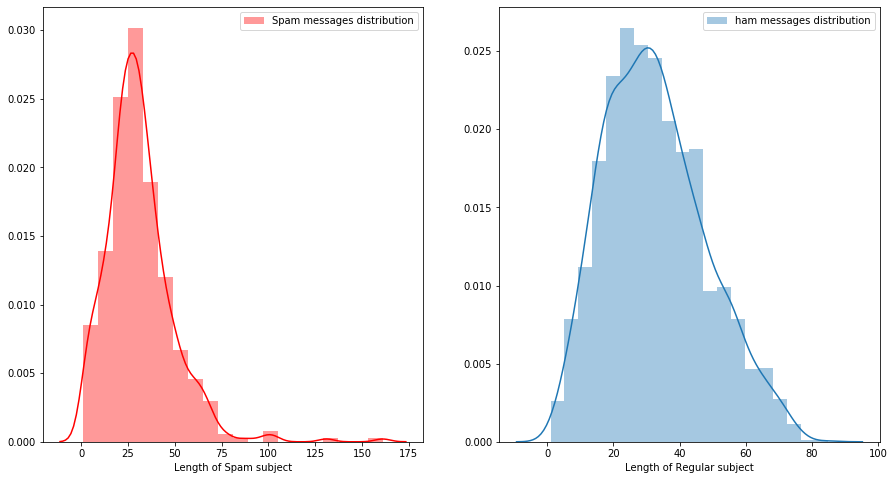

In [262]:
# Word count distribution BEFORE cleaning for subject column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['subject_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam subject')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['subject_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular subject')
ax[1].legend()

plt.show()

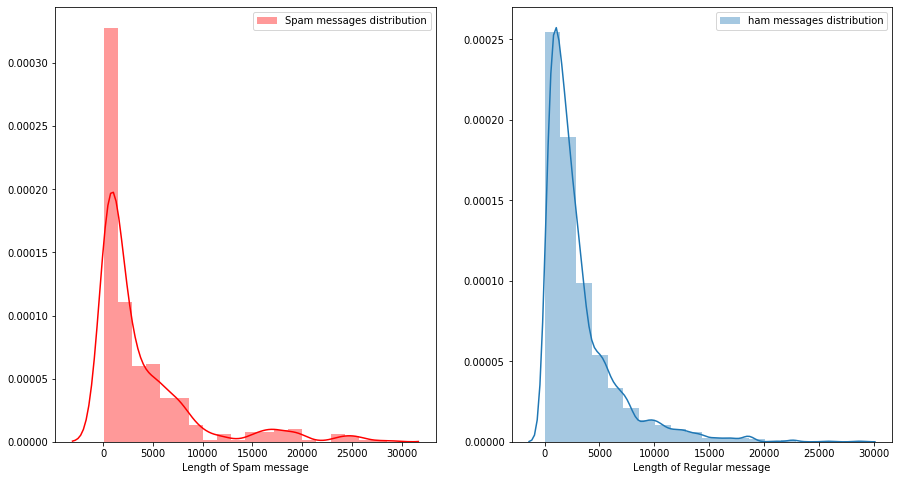

In [263]:
# Word count distribution BEFORE cleaning for message column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['message_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Length of Spam message')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['message_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular message')
ax[1].legend()

plt.show()

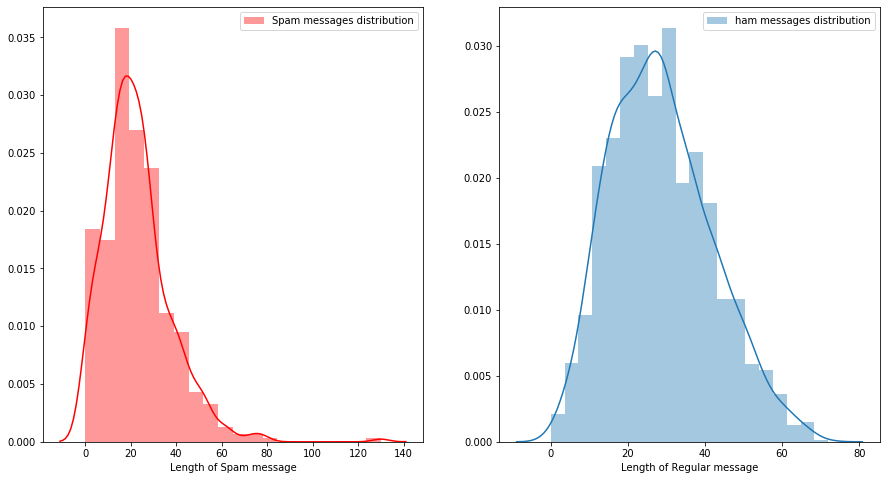

In [264]:
# Word count distribution AFTER cleaning for subject column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['subject_clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Length of Spam message')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['subject_clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular message')
ax[1].legend()

plt.show()

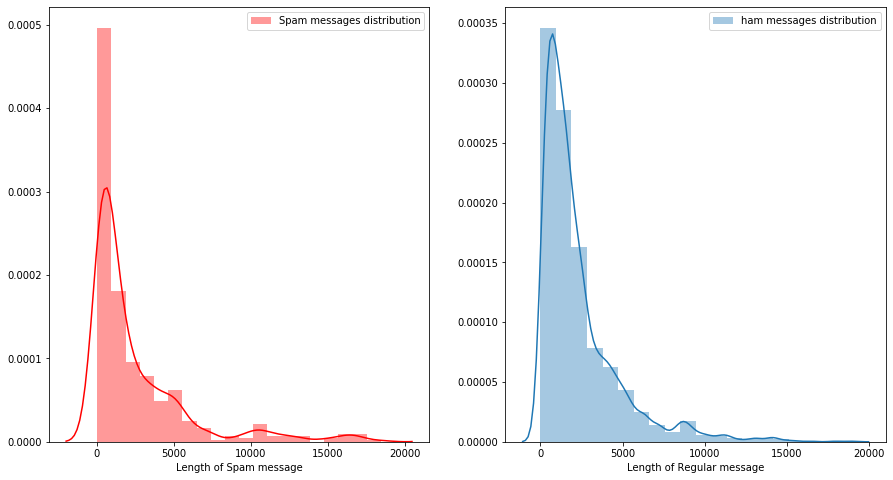

In [265]:
# Word count distribution AFTER cleaning for message column
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(strings[strings['label']==1]['message_clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Length of Spam message')
ax[0].legend()

sns.distplot(strings[strings['label']==0]['message_clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('Length of Regular message')
ax[1].legend()

plt.show()

# 3. Feature extraction

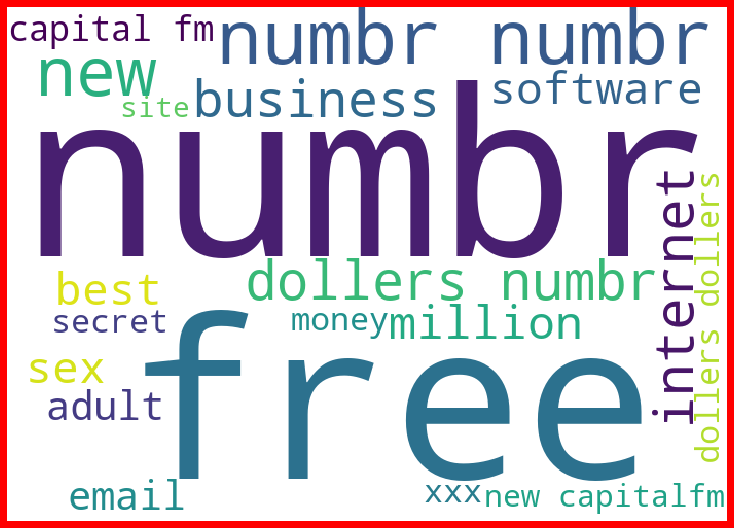

In [266]:
#Getting a sense of loud words in spam for subject column
from wordcloud import WordCloud


spams = strings['subject'][strings['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

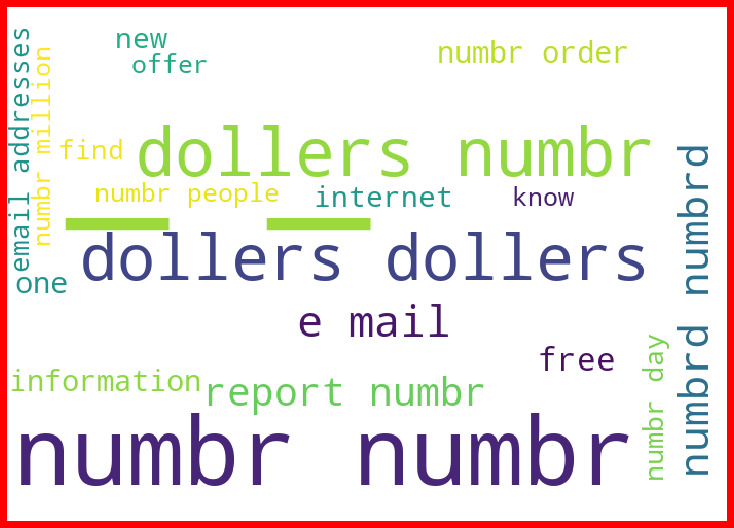

In [267]:
#Getting a sense of loud words in spam for message column
from wordcloud import WordCloud


spams = strings['message'][strings['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

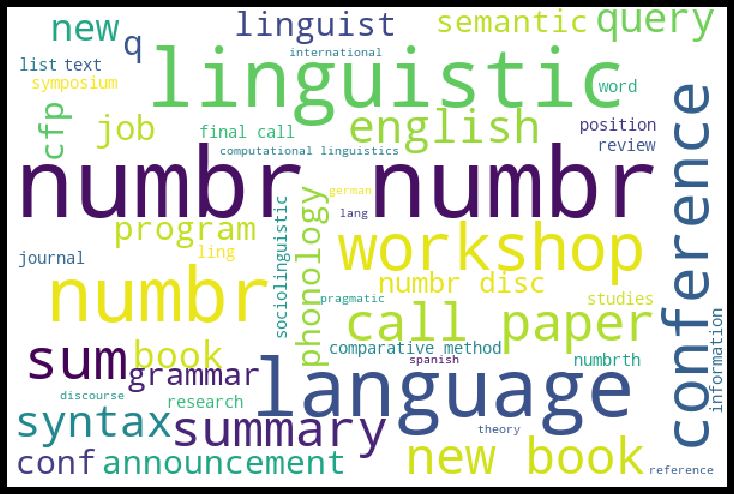

In [268]:
#Getting sense of loud words in regular emails for subject column 

regular = strings['subject'][strings['label']==0]
regular_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(regular))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(regular_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

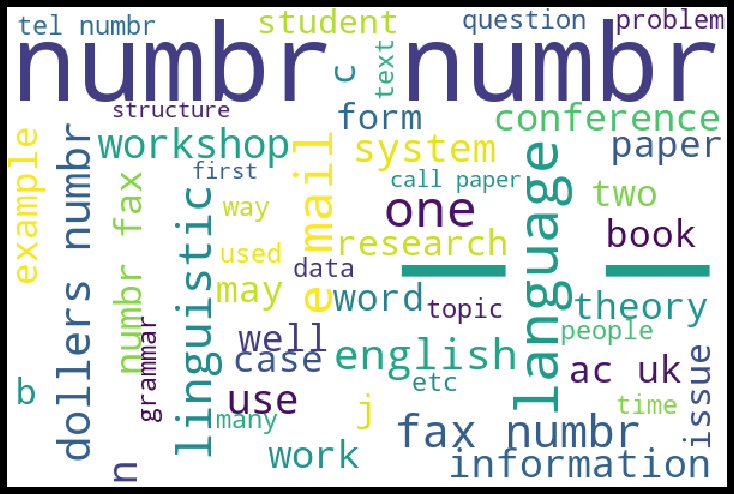

In [269]:
#Getting sense of loud words in regular emails for message column 

regular = strings['message'][strings['label']==0]
regular_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(regular))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(regular_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [270]:
strings.columns

Index(['subject', 'message', 'label', 'subject_length', 'message_length',
       'subject_clean_length', 'message_clean_length'],
      dtype='object')

# 4. Training classifiers

In [271]:
# Convert text into vectors using TF-IDF
# Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()

strings["complete_string"] = strings["subject"] + strings["message"]

x = tf_vec.fit_transform(strings["complete_string"])

y = strings['label']

In [272]:
# Train 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)


# 5. Testing

In [273]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [274]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [275]:
from sklearn.model_selection import cross_val_score

In [276]:
# Using GridSearchCV to select the best parameter

In [277]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [278]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [279]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

In [280]:
# Logistic Regression and binary classification methods

In [281]:
KNN=KNeighborsClassifier(n_neighbors= 3)
LR=LogisticRegression(penalty='l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
RF= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
AD= AdaBoostClassifier()#,n_estimators=50,Learning_rate=1.0)
MNB = MultinomialNB()

In [282]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(n_neighbors=3)



Accuracy score = 0.9703389830508474


cross validation score = 0.9653822226646096


roc_auc_score =  0.953435704816615


classification_report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       584
           1       0.91      0.93      0.92       124

    accuracy                           0.97       708
   macro avg       0.95      0.95      0.95       708
weighted avg       0.97      0.97      0.97       708



[[572  12]
 [  9 115]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression()



Accuracy score = 0.9576271186440678


cross validation score = 0.9530172199273379


roc_auc_score =  0.8790322580645161


classification_report
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    

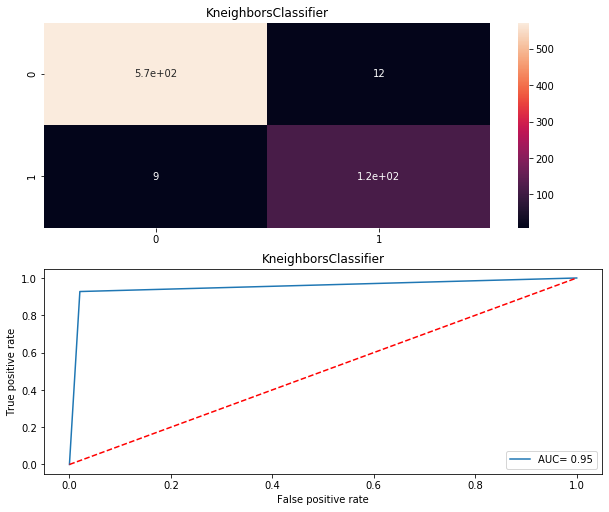

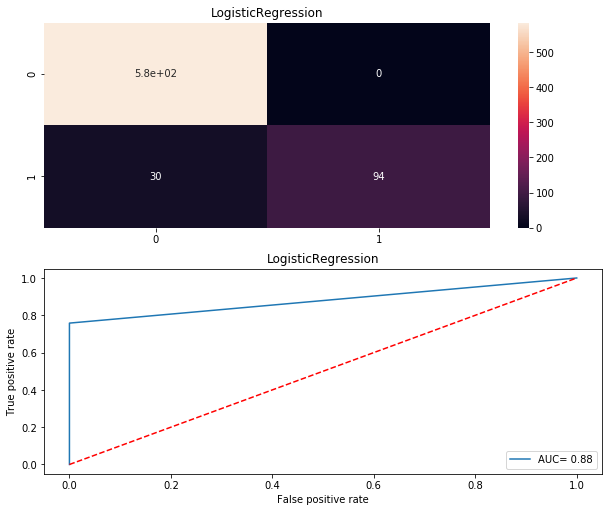

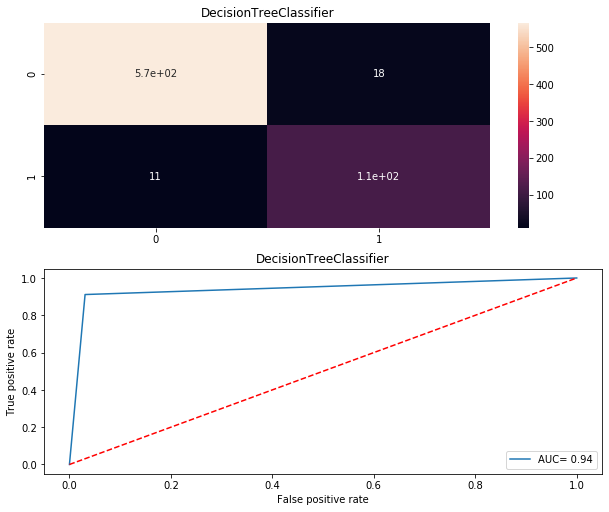

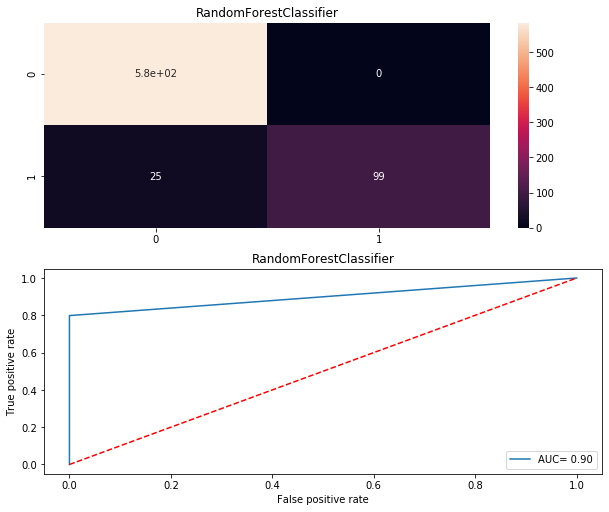

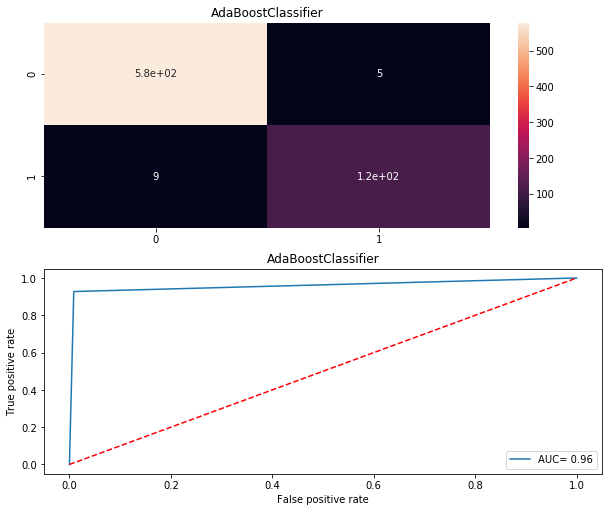

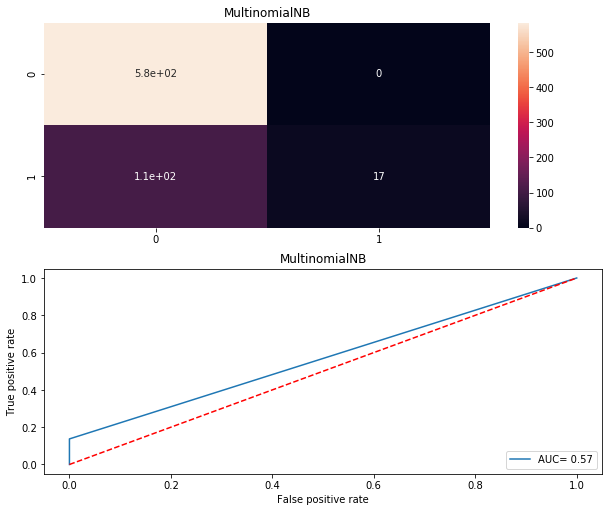

In [283]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [284]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,97.033898,96.538222,95.343570
1,LogisticRegression,95.762712,95.301722,87.903226
2,DecisionTreeClassifier,95.903955,96.644603,94.023420
3,RandomForestClassifier,96.468927,96.997337,89.919355
4,AdaBoostClassifier,98.022599,98.587070,95.942886
5,MultinomialNB,84.887006,86.047877,56.854839


# 6. Performance evaluation using multiple metrics

I choose the AdaBoostClassifier because it has the highest scores.
Besides the scores that are evident in the table above, it also classified the most of the entries in the table accurately.

Classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       584
           1       0.96      0.93      0.94       124

    accuracy                           0.98       708
   macro avg       0.97      0.96      0.97       708
weighted avg       0.98      0.98      0.98       708


Confusion matrix:
[579   5]
[ 9  115]

It only classified 14 out of 708 entries incorrectly.

I ran the results for the "subject" and "message" columns separately but I got the same results as when they are comnined so I've only included the analysis of both columns combined.


# Save the model

In [285]:
#save model as a pickle file
import joblib
joblib.dump(AD,'Spam.pkl')

['Spam.pkl']

In [286]:
# Load and use model to make a prediction
model=joblib.load('Spam.pkl')
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,